# 3D Data Preparation Basics

Preparing time series data for CNNs and LSTMs requires one additional step beyond transforming
the data into a supervised learning problem. The input layer for CNN and LSTM models is specified by the ```
input_shape``` argument on the first hidden layer of the network. This too can make things confusing for beginners as intuitively we may expect the first layer defined in the model be the input layer, not the first hidden layer. For example, below is an example of a network with one hidden LSTM layer and one ```Dense``` output layer. 
```[samples, features]```.

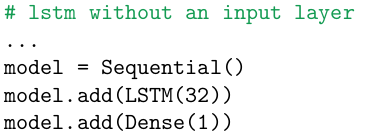

In this example, the ```LSTM()``` layer must specify the shape of the input data. The input to
every CNN and LSTM layer must be three-dimensional. The three dimensions of this input are:

* Samples. One sequence is one sample. A batch is comprised of one or more samples.
* Time Steps. One time step is one point of observation in the sample. One sample is
comprised of multiple time steps.
* Features. One feature is one observation at a time step. One time step is comprised of
one or more features.

This expected three-dimensional structure of input data is often summarized using the array
shape notation of: ```[samples, timesteps, features]```. Remember, that the two-dimensional
shape of a dataset that we are familiar with from the previous section has the array shape of: ```[samples, features]```.

When defining the input layer of your LSTM network, the network assumes you have one
or more samples and requires that you specify the number of time steps and the number of
features. You can do this by specifying a tuple to the ```input_shape``` argument. For example, the
model below defines an input layer that expects 1 or more samples, 3 time steps, and 1 feature

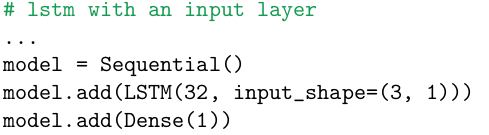

Remember, the first layer in the network is actually the first hidden layer, so in this example 32
refers to the number of units in the first hidden layer. The number of units in the first hidden
layer is completely unrelated to the number of samples, time steps or features in your input
data.

This example maps onto our univariate time series from the previous section that we split into
having 3 input time steps and 1 feature. We may have loaded our time series dataset from CSV
or transformed it to a supervised learning problem in memory. It will have a two-dimensional
shape and we must convert it to a three-dimensional shape with some number of samples, 3
time steps per sample and 1 feature per time step, or ```[?, 3, 1]```. We can do this by using the
```reshape()``` ```NumPy``` function. For example, if we have 7 samples and 3 time steps per sample for
the input element of our time series, we can reshape it into ```[7, 3, 1]``` by providing a tuple to
the ```reshape()``` function specifying the desired new shape of ```(7, 3, 1)```. The array must have
enough data to support the new shape, which in this case it does as ```[7, 3]``` and ```[7, 3, 1]``` are
functionally the same thing.

In [8]:
from numpy import array

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    
    for i in range(len(sequence)):
        
        # find the end of this pattern
        end_ix = i + n_steps
        
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
            
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    return array(X), array(y)

In [9]:
# define univariate time series
series = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(series.shape)

(10,)


In [10]:
# transform to a supervised learning problem
X, y = split_sequence(series, 3)
print(X.shape, y.shape)

(7, 3) (7,)


In [11]:
# transform input from [samples, features] to [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
print(X.shape)

(7, 3, 1)
